# Test 1: Five Formulations

-------------

## Contents
- Notes
- Feasible distributions
    - Solution status
    - Time
- Infeasible distributions
    - Solution status
    - Time
- Appendix

-------------

## Notes
- Directly calling default Mosek solver (IP+BI) with default settings
- Machine: compute2.pi.local
- No slack
- Spiral inflation
- Time measured in seconds
- Formulation specifications: https://github.com/roujiawen/quantum_information/blob/master/get_spiral_form.m
- Code for running test1: https://github.com/roujiawen/quantum_information/blob/master/test1.m

## FEASIBLE DISTRIBUTIONS 
(eta=fea_bound+10^3)

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

feasibility = 'fea'
data_filepath = "../results/500trials/test1_{}.csv".format(feasibility)
df = pd.read_csv(data_filepath)

### Solution status

In [79]:
print 'Data contains {} rows'.format(len(df))
print
title_code = {'itr.prosta': 'Interior-Point Problem Status', 
              'itr.solsta': 'Interior-Point Solution Status', 
              'bas.prosta': 'Basis-Identification Problem Status',
              'bas.solsta': 'Basis-Identification Solution Status', }
for col_name in ['itr.prosta', 'itr.solsta', 'bas.prosta', 'bas.solsta']:
    print '---------------',title_code[col_name], '---------------'
    print
    for _,__ in df[col_name].value_counts().items():
        print __, ' ', _
    print
    tmp = df[['trial', 'const_type', 'basis', col_name, 'time']][df[col_name]=='UNKNOWN']
    if not tmp.empty:
        print 'Rows with UNKNOWN status:'
        print tmp.to_string(index=False)
    print
    print

Data contains 2500 rows

--------------- Interior-Point Problem Status ---------------

2499   PRIMAL_AND_DUAL_FEASIBLE
1   UNKNOWN

Rows with UNKNOWN status:
trial const_type basis itr.prosta     time
  100       ineq    CG    UNKNOWN  8.93685


--------------- Interior-Point Solution Status ---------------

2499   OPTIMAL
1   UNKNOWN

Rows with UNKNOWN status:
trial const_type basis itr.solsta     time
  100       ineq    CG    UNKNOWN  8.93685


--------------- Basis-Identification Problem Status ---------------

2499   PRIMAL_AND_DUAL_FEASIBLE
1   UNKNOWN

Rows with UNKNOWN status:
trial const_type basis bas.prosta         time
  117         eq  corr    UNKNOWN  2793.771074


--------------- Basis-Identification Solution Status ---------------

2499   OPTIMAL
1   UNKNOWN

Rows with UNKNOWN status:
trial const_type basis bas.solsta         time
  117         eq  corr    UNKNOWN  2793.771074




### Time

**Outliers**

In [80]:
outliers = df[df['time'] > 100]
df = df[df['time'] <= 100]
outliers[['trial', 'formulation', 'time', 'MSK_DINF_BI_CLEAN_DUAL_TIME', 'itr.prosta', 'itr.solsta', 'bas.prosta', 'bas.solsta']]

,trial,formulation,time,MSK_DINF_BI_CLEAN_DUAL_TIME,itr.prosta,itr.solsta,bas.prosta,bas.solsta
582,117,eq+corr,2793.771074,2791.691879,PRIMAL_AND_DUAL_FEASIBLE,OPTIMAL,UNKNOWN,UNKNOWN


Plots below exclude the outlier (row #582).

**Total time**

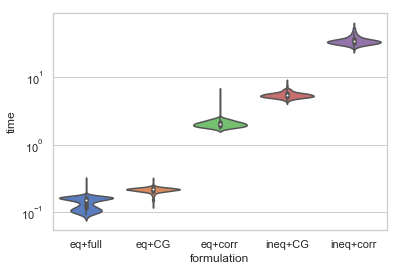

In [81]:
time_type = 'time'# Total time measured with tic-toc
ax = sns.violinplot(x="formulation", y=time_type, #hue="",
                     data=df, palette="muted", scale="count")
ax.set(yscale="log");

** Basis identification time**

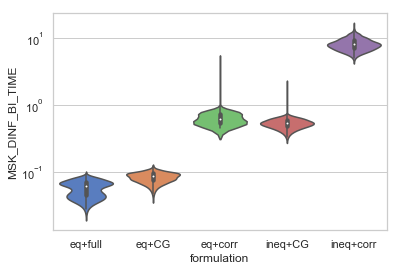

In [82]:
time_type = 'MSK_DINF_BI_TIME'
ax = sns.violinplot(x="formulation", y=time_type, #hue="",
                     data=df, palette="muted", scale="count")
ax.set(yscale="log");

** Basis identification primal time and dual time**

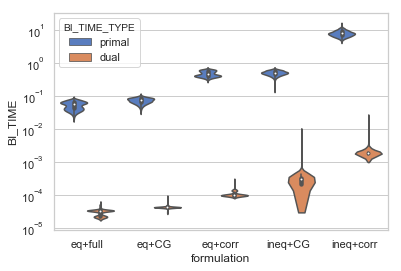

In [84]:
tmp_df1 = df[['formulation', 'MSK_DINF_BI_PRIMAL_TIME', 'MSK_DINF_BI_DUAL_TIME']].copy()
tmp_df1['BI_TIME_TYPE'] = 'primal'
tmp_df1['BI_TIME'] = tmp_df1['MSK_DINF_BI_PRIMAL_TIME']
tmp_df2 = df[['formulation', 'MSK_DINF_BI_PRIMAL_TIME', 'MSK_DINF_BI_DUAL_TIME']].copy()
tmp_df2['BI_TIME_TYPE'] = 'dual'
tmp_df2['BI_TIME'] = tmp_df1['MSK_DINF_BI_DUAL_TIME']
tmp_df = pd.concat([tmp_df1, tmp_df2])

time_type = 'BI_TIME'
ax = sns.violinplot(x="formulation", y=time_type, hue="BI_TIME_TYPE",
                     data=tmp_df, palette="muted", scale="count")
ax.set(yscale="log");

**Basis identification clean time**

(the empty bin indicates all zeros)

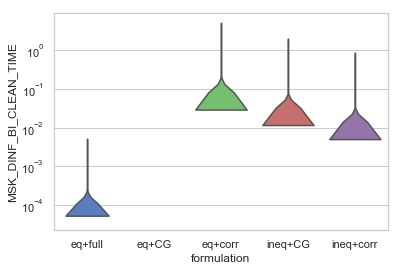

In [85]:
time_type = 'MSK_DINF_BI_CLEAN_TIME'
ax = sns.violinplot(x="formulation", y=time_type, #hue="",
                     data=df, palette="muted", scale="count")
ax.set(yscale="log");

** Presolve time**

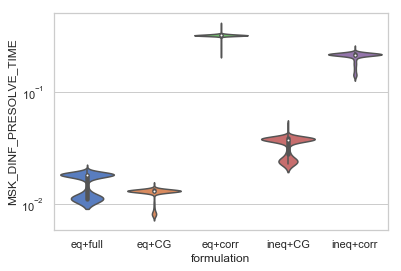

In [86]:
time_type = 'MSK_DINF_PRESOLVE_TIME'
ax = sns.violinplot(x="formulation", y=time_type, #hue="",
                     data=df, palette="muted", scale="count")
ax.set(yscale="log");

## INFEASIBLE DISTRIBUTIONS 
(eta=fea_bound-10^3)

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

feasibility = 'infea'
data_filepath = "../results/500trials/test1_{}.csv".format(feasibility)
df = pd.read_csv(data_filepath)

In [88]:
# New column with labels 'const_type+basis'
def get_formulation_label(row):
    return row['const_type']+'+'+row['basis']
df['formulation'] = df.apply(get_formulation_label, axis=1)

### Solution status

In [89]:
print 'Data contains {} rows'.format(len(df))
print
title_code = {'itr.prosta': 'Interior-Point Problem Status', 
              'itr.solsta': 'Interior-Point Solution Status', 
              'bas.prosta': 'Basis-Identification Problem Status',
              'bas.solsta': 'Basis-Identification Solution Status', }
for col_name in ['itr.prosta', 'itr.solsta', 'bas.prosta', 'bas.solsta']:
    print '---------------',title_code[col_name], '---------------'
    print
    for _,__ in df[col_name].value_counts().items():
        print __, ' ', _
    print
    tmp = df[['trial', 'const_type', 'basis', col_name, 'time']][df[col_name]=='UNKNOWN']
    if not tmp.empty:
        print 'Rows with UNKNOWN status:'
        print tmp.to_string(index=False)
    print
    print

Data contains 2500 rows

--------------- Interior-Point Problem Status ---------------

2493   PRIMAL_INFEASIBLE
7   UNKNOWN

Rows with UNKNOWN status:
trial const_type basis itr.prosta        time
   20       ineq    CG    UNKNOWN  115.579652
   88       ineq    CG    UNKNOWN   10.873788
  105       ineq    CG    UNKNOWN    9.564959
  231       ineq    CG    UNKNOWN  123.362020
  250       ineq    CG    UNKNOWN    9.426109
  349       ineq    CG    UNKNOWN  121.450608
  373       ineq    CG    UNKNOWN  112.915575


--------------- Interior-Point Solution Status ---------------

2493   PRIMAL_INFEASIBLE_CER
7   UNKNOWN

Rows with UNKNOWN status:
trial const_type basis itr.solsta        time
   20       ineq    CG    UNKNOWN  115.579652
   88       ineq    CG    UNKNOWN   10.873788
  105       ineq    CG    UNKNOWN    9.564959
  231       ineq    CG    UNKNOWN  123.362020
  250       ineq    CG    UNKNOWN    9.426109
  349       ineq    CG    UNKNOWN  121.450608
  373       ineq    CG  

### Time

**Total time**

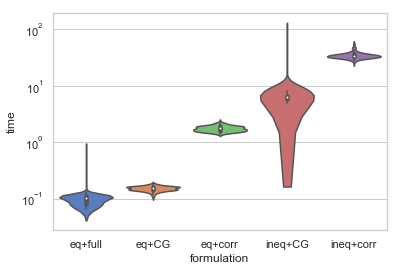

In [90]:
time_type = 'time'# Total time measured with tic-toc
ax = sns.violinplot(x="formulation", y=time_type, #hue="",
                     data=df, palette="muted", scale="count")
ax.set(yscale="log");

** Basis identification time**

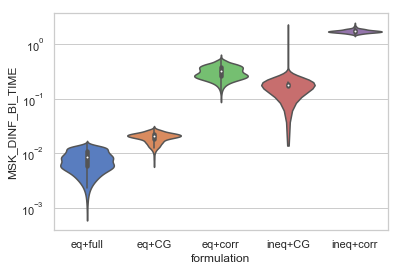

In [91]:
time_type = 'MSK_DINF_BI_TIME'
ax = sns.violinplot(x="formulation", y=time_type, #hue="",
                     data=df, palette="muted", scale="count")
ax.set(yscale="log");

** Basis identification primal time and dual time**

(the empty bins indicate all zeros)

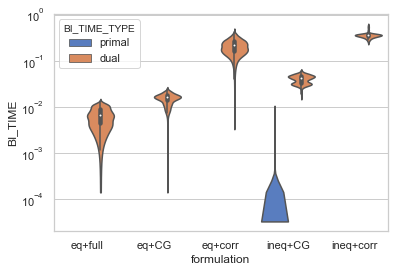

In [92]:
tmp_df1 = df[['formulation', 'MSK_DINF_BI_PRIMAL_TIME', 'MSK_DINF_BI_DUAL_TIME']].copy()
tmp_df1['BI_TIME_TYPE'] = 'primal'
tmp_df1['BI_TIME'] = tmp_df1['MSK_DINF_BI_PRIMAL_TIME']
tmp_df2 = df[['formulation', 'MSK_DINF_BI_PRIMAL_TIME', 'MSK_DINF_BI_DUAL_TIME']].copy()
tmp_df2['BI_TIME_TYPE'] = 'dual'
tmp_df2['BI_TIME'] = tmp_df1['MSK_DINF_BI_DUAL_TIME']
tmp_df = pd.concat([tmp_df1, tmp_df2])

time_type = 'BI_TIME'
ax = sns.violinplot(x="formulation", y=time_type, hue="BI_TIME_TYPE",
                     data=tmp_df, palette="muted", scale="count")
ax.set(yscale="log");

**Basis identification clean time **

(the empty bins indicate all zeros)

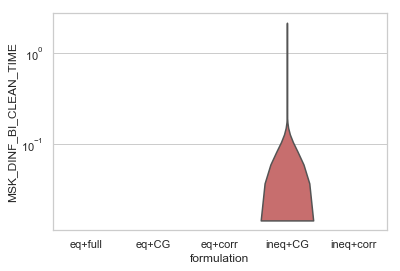

In [93]:
time_type = 'MSK_DINF_BI_CLEAN_TIME'
ax = sns.violinplot(x="formulation", y=time_type, #hue="",
                     data=df, palette="muted", scale="count")
ax.set(yscale="log");

** Presolve time**

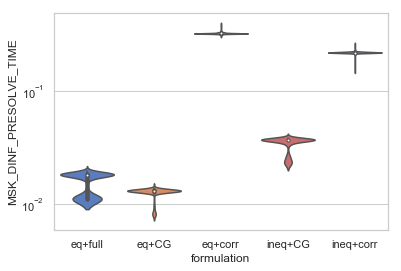

In [94]:
time_type = 'MSK_DINF_PRESOLVE_TIME'
ax = sns.violinplot(x="formulation", y=time_type, #hue="",
                     data=df, palette="muted", scale="count")
ax.set(yscale="log");

## Appendix

(https://docs.mosek.com/8.1/toolbox/constants.html#mosek.dinfitem)

"MSK_DINF_BI_TIME"
Time spent within the basis identification procedure since its invocation.

"MSK_DINF_BI_DUAL_TIME"
Time spent within the dual phase basis identification procedure since its invocation.

"MSK_DINF_BI_PRIMAL_TIME"
Time spent within the primal phase of the basis identification procedure since its invocation.

"MSK_DINF_BI_CLEAN_TIME"
Time spent within the clean-up phase of the basis identification procedure since its invocation.

"MSK_DINF_PRESOLVE_TIME"
Total time (in seconds) spent in the presolve since it was invoked.

In [44]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')